In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('frontend_vacancies.csv')

In [6]:
df.head()

,Должность,Ссылка,Компания,Зарплата,Опыт,Удаленная работа,GIT,LINUX,DOCKER,AWS,KUBERNETES,JAVASCRIPT,TYPESCRIPT,REACT,VUE,ANGULAR,HTML_CSS,WEBPACK,NODEJS
0,Тестировщик ПО,https://hh.ru/vacancy/119122919,Carcade Leasing,от 100000 RUR,От 1 года до 3 лет,Да,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Frontend-разработчик (React.js, TypeScript) Mi...",https://hh.ru/vacancy/119138438,INVEST 7,не указана,От 1 года до 3 лет,Да,1,0,0,0,0,1,1,1,0,0,0,0,0
2,Frontend developer (React),https://hh.ru/vacancy/119127939,Tennisi,не указана,Более 6 лет,Нет,1,0,0,0,0,1,1,1,0,0,0,1,0
3,Middle разработчик React (RuBackup),https://hh.ru/vacancy/119172098,Группа компаний Астра,не указана,От 1 года до 3 лет,Да,0,1,1,0,0,1,1,1,0,0,1,1,0
4,Frontend-разработчик (React/TypeScript),https://hh.ru/vacancy/118971725,Октопустех,не указана,От 3 до 6 лет,Да,1,0,0,0,0,0,1,1,0,0,0,0,0


<ipython-input-7-c678bbe6aeab>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  skills = df.iloc[:, 6:].applymap(lambda x: 1 if str(x).strip() in ['PYTHON', 'SQL', '1'] else 0)


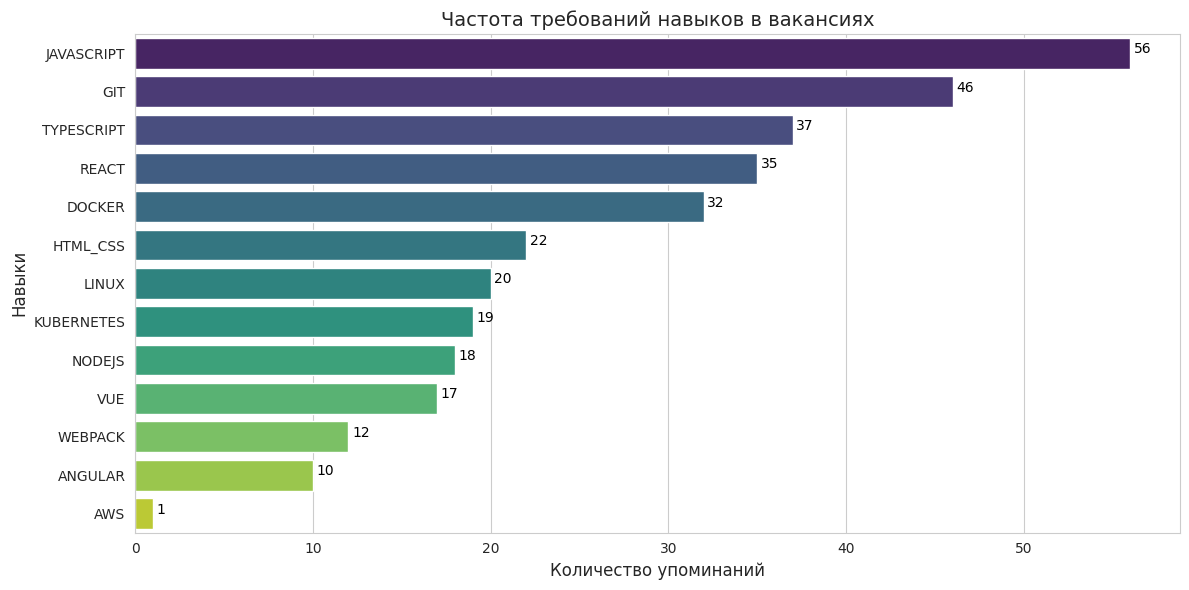

In [7]:
skills = df.iloc[:, 6:].applymap(lambda x: 1 if str(x).strip() in ['PYTHON', 'SQL', '1'] else 0)

skills_sum = skills.sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

ax = sns.barplot(
    x=skills_sum.values,
    y=skills_sum.index,
    hue=skills_sum.index,
    palette="viridis",
    legend=False
)

for i, v in enumerate(skills_sum.values):
    ax.text(v + 0.2, i, str(int(v)), color='black', ha='left')

plt.title('Частота требований навыков в вакансиях', fontsize=14)
plt.xlabel('Количество упоминаний', fontsize=12)
plt.ylabel('Навыки', fontsize=12)
plt.tight_layout()

plt.show()


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Должность         186 non-null    object
 1   Ссылка            186 non-null    object
 2   Компания          186 non-null    object
 3   Зарплата          186 non-null    object
 4   Опыт              186 non-null    object
 5   Удаленная работа  186 non-null    object
 6   GIT               186 non-null    int64 
 7   LINUX             186 non-null    int64 
 8   DOCKER            186 non-null    int64 
 9   AWS               186 non-null    int64 
 10  KUBERNETES        186 non-null    int64 
 11  JAVASCRIPT        186 non-null    int64 
 12  TYPESCRIPT        186 non-null    int64 
 13  REACT             186 non-null    int64 
 14  VUE               186 non-null    int64 
 15  ANGULAR           186 non-null    int64 
 16  HTML_CSS          186 non-null    int64 
 17  WEBPACK         

In [9]:
experience_mapping = {
    'Нет опыта': 0,
    'От 1 года до 3 лет': 2,  # среднее между 1 и 3
    'От 3 до 6 лет': 4.5,     # среднее между 3 и 6
    'Более 6 лет': 7           # можно задать условное значение
}

df['exp_in_num'] = df['Опыт'].map(experience_mapping)

In [10]:
df.describe()

,GIT,LINUX,DOCKER,AWS,KUBERNETES,JAVASCRIPT,TYPESCRIPT,REACT,VUE,ANGULAR,HTML_CSS,WEBPACK,NODEJS,exp_in_num
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,0.247312,0.107527,0.172043,0.005376,0.102151,0.301075,0.198925,0.188172,0.091398,0.053763,0.118280,0.064516,0.096774,3.741935
std,0.432614,0.310618,0.378436,0.073324,0.303664,0.459963,0.400269,0.391904,0.288952,0.226159,0.323811,0.246333,0.296448,1.619331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.500000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Удаленная работа (код)'] = le.fit_transform(df['Удаленная работа'])


In [12]:
print(df.iloc[:, 3].dtype)

object


In [13]:
for i in range(len(df)):
  if df.iloc[i, 3] == 'не указана':
    df.iloc[i, 3] = np.nan
    continue

  text = str(df.iloc[i, 3]).split()
  if len(text) == 5:
    df.iloc[i, 3] = float((int(text[1]) + int(text[3])) // 2)
  if len(text) == 3:
    df.iloc[i, 3] = float(int(text[1]))
  if text[-1] == 'USD' or text[-1] == 'EUR':
    df.iloc[i, 3] = float(df.iloc[i, 3] * 93)
df['Зарплата'] = pd.to_numeric(df['Зарплата'], errors='coerce').astype('Int64')

In [14]:
df

,Должность,Ссылка,Компания,Зарплата,Опыт,Удаленная работа,GIT,LINUX,DOCKER,AWS,...,JAVASCRIPT,TYPESCRIPT,REACT,VUE,ANGULAR,HTML_CSS,WEBPACK,NODEJS,exp_in_num,Удаленная работа (код)
0,Тестировщик ПО,https://hh.ru/vacancy/119122919,Carcade Leasing,100000,От 1 года до 3 лет,Да,0,0,0,0,...,0,0,0,0,0,0,0,0,2.0,0
1,"Frontend-разработчик (React.js, TypeScript) Mi...",https://hh.ru/vacancy/119138438,INVEST 7,<NA>,От 1 года до 3 лет,Да,1,0,0,0,...,1,1,1,0,0,0,0,0,2.0,0
2,Frontend developer (React),https://hh.ru/vacancy/119127939,Tennisi,<NA>,Более 6 лет,Нет,1,0,0,0,...,1,1,1,0,0,0,1,0,7.0,1
3,Middle разработчик React (RuBackup),https://hh.ru/vacancy/119172098,Группа компаний Астра,<NA>,От 1 года до 3 лет,Да,0,1,1,0,...,1,1,1,0,0,1,1,0,2.0,0
4,Frontend-разработчик (React/TypeScript),https://hh.ru/vacancy/118971725,Октопустех,<NA>,От 3 до 6 лет,Да,1,0,0,0,...,0,1,1,0,0,0,0,0,4.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Full-stack разработчик middle (C# + Angular),https://hh.ru/vacancy/116784766,Центр Методического Обеспечения Оптимизации Пр...,<NA>,От 3 до 6 лет,Да,1,0,0,0,...,1,0,0,0,1,1,0,0,4.5,0
182,Lead of Design System,https://hh.ru/vacancy/118259610,Домклик,<NA>,От 3 до 6 лет,Да,0,0,0,0,...,0,0,0,0,0,0,0,0,4.5,0
183,SRE/DevOps-инженер,https://hh.ru/vacancy/118068430,Премиум Бонус,<NA>,От 3 до 6 лет,Да,0,1,1,0,...,0,1,0,0,0,0,0,1,4.5,0
184,"Руководитель проекта Отдела сопровождения РКО,...",https://hh.ru/vacancy/117962639,Банк НОВИКОМ,<NA>,От 3 до 6 лет,Нет,0,0,0,0,...,0,0,0,0,0,0,0,0,4.5,1


Так как в столбце зарплата огромное количество пропусков попытаемся заполнить их предсказанными значениями. Для этого обучим две модели (KNN, RandomForest) и воспользуемся лучшей моделью для заполнения неизвестных значений

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [16]:
not_null_salaries = df.iloc[df['Зарплата'].notna().values]

X_train, X_test, y_train, y_test = train_test_split(
    not_null_salaries.iloc[:, 6::],
    not_null_salaries.iloc[:, 3],
    test_size=0.15,
    random_state=10
)
X_train.shape, X_test.shape

((45, 15), (9, 15))

In [17]:
params = {'n_neighbors': [2, 3, 4, 5], 'metric': ['euclidean', 'manhattan', 'minkowski']}
knn = KNeighborsRegressor()
model = GridSearchCV(knn, params)

model.fit(X_train, y_train)
print(model.best_score_, model.best_params_)

-1.2610702160801481 {'metric': 'manhattan', 'n_neighbors': 5}


In [18]:
knn = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

-1.2678823170731706

In [19]:
from sklearn.metrics import mean_absolute_error

y_pred = knn.predict(X_test)
df_pred_real = pd.DataFrame({'predict': y_pred, 'real': y_test})
print(mean_absolute_error(y_pred, y_test))
df_pred_real

67922.22222222222


,predict,real
56,403000.0,350000
11,151300.0,170000
147,300000.0,270000
49,156300.0,160000
109,210500.0,300000
121,116000.0,200000
128,165300.0,170000
95,403000.0,100000
63,175300.0,200000


In [20]:
from sklearn.tree import DecisionTreeRegressor

params = {'criterion': ['squared_error', 'absolute_error'],
          'max_depth': [None, 3, 5, 7, 10],
          'min_samples_split': [2, 5, 10, 15],
          'min_samples_leaf': [1, 2, 4, 6], }

tree = DecisionTreeRegressor(random_state=10)
model = GridSearchCV(tree, params)
model.fit(X_train, y_train)
print(model.best_score_, model.best_params_)

0.1084082690012335 {'criterion': 'absolute_error', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [21]:
clf = DecisionTreeRegressor(random_state=10, criterion='absolute_error', min_samples_leaf=1, min_samples_split=5, max_depth=3)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

-2.2139227642276422

In [22]:
y_pred = clf.predict(X_test)
df_pred_real = pd.DataFrame({'predict': y_pred, 'real': y_test})
print(mean_absolute_error(y_pred, y_test))
df_pred_real

119444.44444444444


,predict,real
56,130000.0,350000
11,325000.0,170000
147,325000.0,270000
49,325000.0,160000
109,200000.0,300000
121,130000.0,200000
128,325000.0,170000
95,130000.0,100000
63,325000.0,200000


In [23]:
for i in range(len(df)):
  if pd.isna(df.iloc[i, 3]):
    features = df.iloc[i, 6:].values.reshape(1, -1)
    df.iloc[i, 3] = clf.predict(features)[0]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/

{'whiskers': [<matplotlib.lines.Line2D at 0x7b0985aaf750>,
 'caps': [<matplotlib.lines.Line2D at 0x7b0985a74ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b0985ab9990>],
 'medians': [<matplotlib.lines.Line2D at 0x7b09856fd510>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b09856fde50>],
 'means': []}

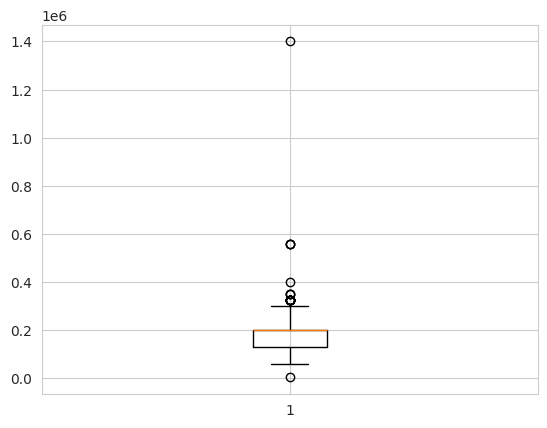

In [24]:
plt.boxplot(df[['Зарплата']])

(array([ 62., 101.,  19.,   3.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([   1500.,  141350.,  281200.,  421050.,  560900.,  700750.,
         840600.,  980450., 1120300., 1260150., 1400000.]),
 <BarContainer object of 10 artists>)

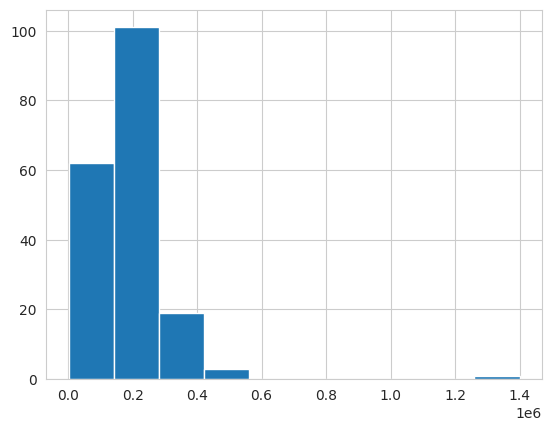

In [25]:
plt.hist(df[['Зарплата']])

In [26]:
print(df[['Зарплата']].median(), df[['Зарплата']].mean(), sep='\n')

Зарплата    200000.0
dtype: Float64
Зарплата    199500.0
dtype: Float64


<Axes: >

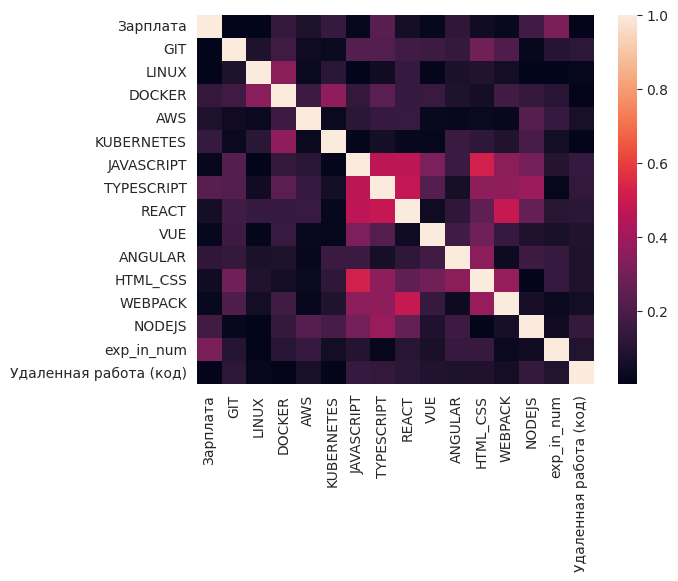

In [27]:
corr_df = df[['Зарплата', 'GIT', 'LINUX', 'DOCKER', 'AWS',	'KUBERNETES', 'JAVASCRIPT',	'TYPESCRIPT', 'REACT', 'VUE', 'ANGULAR',	'HTML_CSS',	'WEBPACK', 'NODEJS',	'exp_in_num',	'Удаленная работа (код)']].corr().abs()

sns.heatmap(corr_df,
            xticklabels=corr_df.columns.values,
            yticklabels=corr_df.columns.values)

В матрице корреляций можно заметить, что зарплата лучшего всего коррелирует с опытом работы (значение почти 0.4), с остальными значение около 0.1-0.3 (лучше всего с TYPESCRPT,REACT,HTML,CSS)


In [28]:
df_students = pd.read_csv('universities_front.csv')
df_students

,ВУЗ,GIT,LINUX,DOCKER,AWS,KUBERNETES,JAVASCRIPT,TYPESCRIPT,REACT,VUE,ANGULAR,HTML_CSS,WEBPACK,NODEJS
0,ЧГУ,1,0,0,0,0,1,0,1,0,0,1,0,0
1,МФТИ,1,1,1,0,0,1,1,1,0,0,1,1,1
2,ИТМО,1,1,1,1,1,1,1,1,1,1,1,1,1
3,МГУ,1,0,0,0,0,1,1,1,0,1,1,1,1
4,МГТУ Баумана,1,0,0,0,0,1,1,1,0,0,1,1,1
5,МИФИ,1,1,1,0,0,1,1,1,0,0,1,1,1
6,ВШЭ,1,0,1,1,0,1,1,1,1,1,1,1,1
7,МИРЭА,1,0,0,0,0,1,1,1,0,0,1,1,1
8,БГТУ,1,0,0,0,0,1,0,1,0,0,1,0,0
9,ОГУ,1,0,0,0,0,1,0,1,0,0,1,0,0


<ipython-input-29-5ee64bc9b6f7>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  skills = df_students.iloc[:, 1:].applymap(lambda x: 1 if str(x).strip() in ['PYTHON', 'SQL', '1'] else 0)


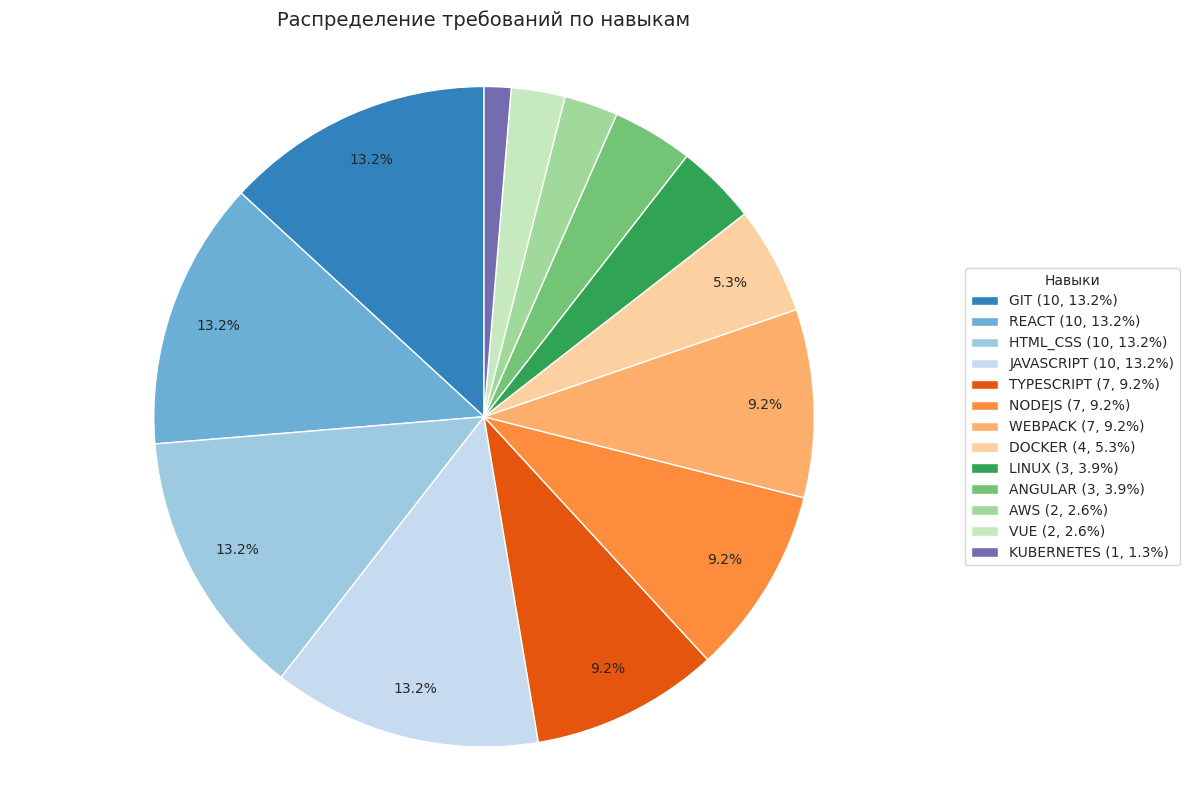

In [29]:
skills = df_students.iloc[:, 1:].applymap(lambda x: 1 if str(x).strip() in ['PYTHON', 'SQL', '1'] else 0)

skills_sum = skills.sum().sort_values(ascending=False)

non_zero_skills = skills_sum[skills_sum > 0]
labels = non_zero_skills.index
sizes = non_zero_skills.values

colors = plt.cm.tab20c(np.arange(len(labels)) % 20)

fig, ax = plt.subplots(figsize=(12, 8))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=None,
    autopct=lambda p: f'{p:.1f}%' if p >= 5 else '',
    startangle=90,
    colors=colors,
    pctdistance=0.85,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    textprops={'fontsize': 10}
)

# Добавляем легенду со всеми навыками и процентами
legend_labels = [f"{label} ({size}, {pct:.1f}%)"
                for label, size, pct in zip(labels, sizes, sizes/sizes.sum()*100)]
ax.legend(
    wedges,
    legend_labels,
    title="Навыки",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10
)

# Равный аспект, чтобы круг был кругом
ax.axis('equal')
plt.title('Распределение требований по навыкам', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

Из диаграммы видно, что на данный момент HTML JAVASCRIPT TYPESCRIPT И REACT изучается в большинстве популярных вузов


#Модель для прогноза зарплаты студентов, различных вузов

На основе имеющихся данных обучим несколько моделей, для подбора гиперпараметров воспользуемся GridSearch

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, 6:],
    df.iloc[:, 3],
    test_size=0.2,
    random_state=30
)
X_train.shape, X_test.shape

((148, 15), (38, 15))

In [31]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

Для данной задачи будем пользоваться метрикой MAE, так как зарплата имеет большие значения и квадрат расстояния будет слишком сильно завышаться

In [32]:
gb_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5]
}

rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 0.5]
}

lr_params = {
    'fit_intercept': [True, False],
    'positive': [True, False]  # Только для sklearn >= 1.0
}

svr_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'epsilon': [0.01, 0.1]
}

knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 - манхэттенское, 2 - евклидово расстояние
}

mlp_params = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001, 0.01]
}

all_params = {
    'GradientBoostingRegressor': (GradientBoostingRegressor(), gb_params),
    'RandomForestRegressor': (RandomForestRegressor(), rf_params),
    'LinearRegression': (LinearRegression(), lr_params),
    'SVR': (SVR(), svr_params),
    'KNeighborsRegressor': (KNeighborsRegressor(), knn_params),
    'MLPRegressor': (MLPRegressor(max_iter=1000), mlp_params)
}

In [33]:
from sklearn.model_selection import RandomizedSearchCV

results = []
for test_model in [LinearRegression, SVR, KNeighborsRegressor, RandomForestRegressor, GradientBoostingRegressor, MLPRegressor]:
  model_name = test_model.__name__

  clf = RandomizedSearchCV(
      all_params[model_name][0],
      param_distributions=all_params[model_name][1],
      n_iter=10,
      cv=5,
      n_jobs=-1,
      scoring='neg_mean_absolute_error',
      random_state=30
  )

  clf.fit(X_train, y_train)

  results.append({
        'model': model_name,
        'best_params': clf.best_params_,
        'best_score': clf.best_score_,
        'best_estimator': clf.best_estimator_
    })
  print(results[-1])


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'model': 'LinearRegression', 'best_params': {'positive': True, 'fit_intercept': True}, 'best_score': np.float64(-49621.73571889274), 'best_estimator': LinearRegression(positive=True)}
{'model': 'SVR', 'best_params': {'kernel': 'linear', 'epsilon': 0.01, 'C': 10}, 'best_score': np.float64(-57175.33764600598), 'best_estimator': SVR(C=10, epsilon=0.01, kernel='linear')}
{'model': 'KNeighborsRegressor', 'best_params': {'weights': 'uniform', 'p': 1, 'n_neighbors': 7}, 'best_score': np.float64(-41554.81116584565), 'best_estimator': KNeighborsRegressor(n_neighbors=7, p=1)}
{'model': 'RandomForestRegressor', 'best_params': {'n_estimators': 50, 'min_samples_split': 5, 'max_features': 0.5, 'max_depth': 10}, 'best_score': np.float64(-46807.34047496711), 'best_estimator': RandomForestRegressor(max_depth=10, max_features=0.5, min_samples_split=5,
                      n_estimators=50)}
{'model': 'GradientBoostingRegressor', 'best_params': {'n_estimators': 50, 'min_samples_split': 5, 'max_depth': 5

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [34]:
results_df = pd.DataFrame(results)
results_df

,model,best_params,best_score,best_estimator
0,LinearRegression,"{'positive': True, 'fit_intercept': True}",-49621.735719,LinearRegression(positive=True)
1,SVR,"{'kernel': 'linear', 'epsilon': 0.01, 'C': 10}",-57175.337646,"SVR(C=10, epsilon=0.01, kernel='linear')"
2,KNeighborsRegressor,"{'weights': 'uniform', 'p': 1, 'n_neighbors': 7}",-41554.811166,"KNeighborsRegressor(n_neighbors=7, p=1)"
3,RandomForestRegressor,"{'n_estimators': 50, 'min_samples_split': 5, '...",-46807.340475,"(DecisionTreeRegressor(max_depth=10, max_featu..."
4,GradientBoostingRegressor,"{'n_estimators': 50, 'min_samples_split': 5, '...",-41622.404880,([DecisionTreeRegressor(criterion='friedman_ms...
5,MLPRegressor,"{'learning_rate_init': 0.01, 'hidden_layer_siz...",-117838.491638,"MLPRegressor(learning_rate_init=0.01, max_iter..."


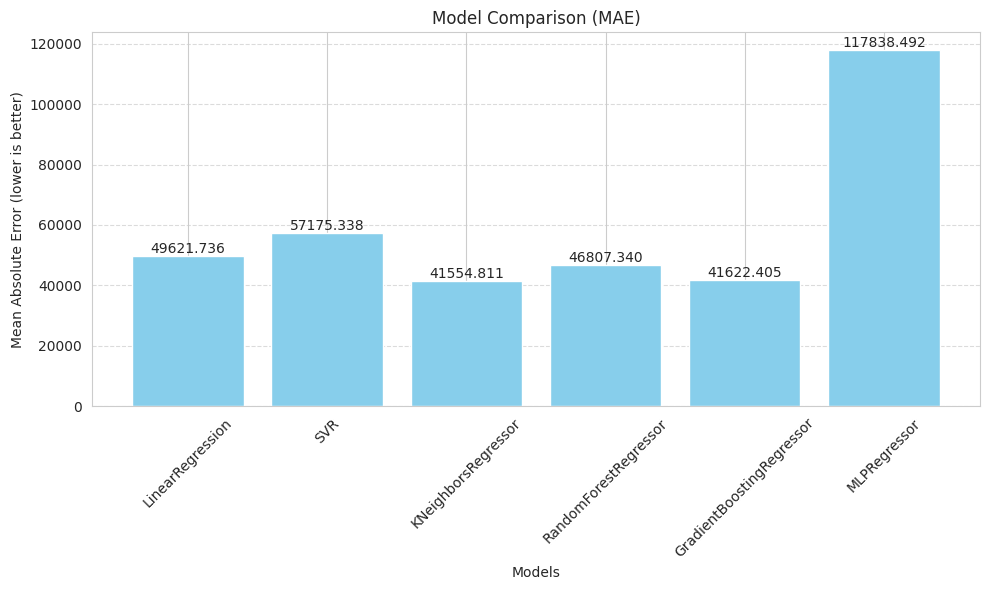

In [35]:
results_df['MAE'] = -results_df['best_score']

plt.figure(figsize=(10, 6))
bars = plt.bar(results_df['model'], results_df['MAE'], color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

plt.title('Model Comparison (MAE)')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (lower is better)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [36]:
from sklearn.metrics import mean_absolute_error

results_for_tests = []
for clf in results_df['best_estimator']:
  y_pred = clf.predict(X_test)
  mae = mean_absolute_error(y_pred, y_test)
  results_for_tests.append({
      'model': clf.__class__.__name__,
      'MAE': mae,
      })

In [37]:
results_for_tests = pd.DataFrame(results_for_tests)

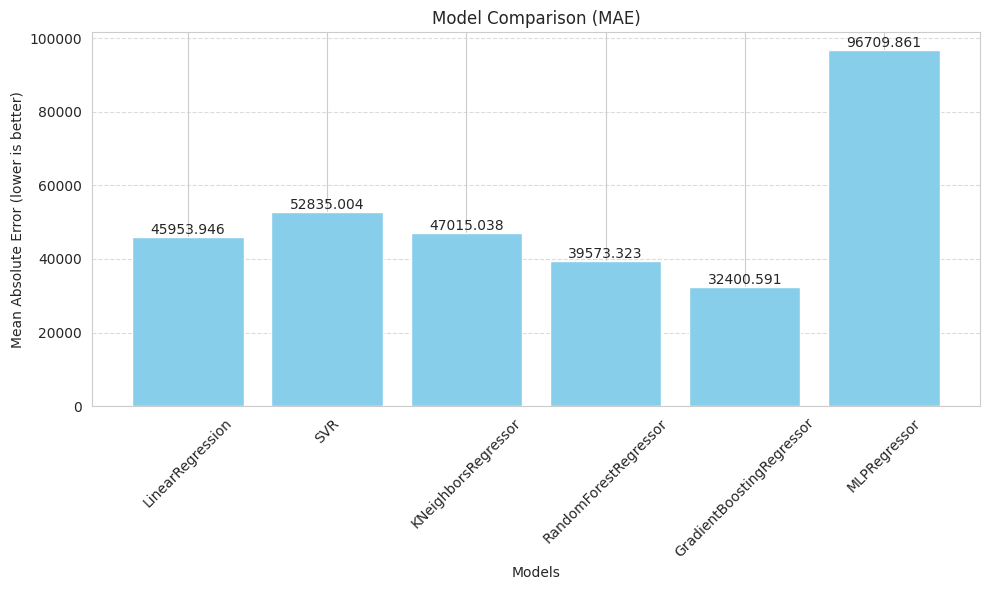

In [38]:
plt.figure(figsize=(10, 6))
bars = plt.bar(results_for_tests['model'], results_for_tests['MAE'], color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

plt.title('Model Comparison (MAE)')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (lower is better)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

На тестовых и на обучающих данных лучше всего себя показал градиентный бустинг, его использовать и будем. Также на обучающих данных очень хорошо себя показал KNN, но на тестовых данных прогноз сильно отличается

#Теперь на основе модели GradientBoostingRegressor сделаем прогноз для студентов


In [39]:
df_students['exp_in_num'] = 0
df_students['Удаленная работа (код)'] = 0
df_students.iloc[:, 1:13]

,GIT,LINUX,DOCKER,AWS,KUBERNETES,JAVASCRIPT,TYPESCRIPT,REACT,VUE,ANGULAR,HTML_CSS,WEBPACK
0,1,0,0,0,0,1,0,1,0,0,1,0
1,1,1,1,0,0,1,1,1,0,0,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0,0,0,0,1,1,1,0,1,1,1
4,1,0,0,0,0,1,1,1,0,0,1,1
5,1,1,1,0,0,1,1,1,0,0,1,1
6,1,0,1,1,0,1,1,1,1,1,1,1
7,1,0,0,0,0,1,1,1,0,0,1,1
8,1,0,0,0,0,1,0,1,0,0,1,0
9,1,0,0,0,0,1,0,1,0,0,1,0


In [40]:
model = results_df[results_df['model'] == 'GradientBoostingRegressor']['best_estimator'].iloc[0]
students_salary_pred = model.predict(df_students.iloc[:,1:16])
students_salary_pred


array([113399.39548709, 150174.2221309 , 141863.9850272 , 142527.3806391 ,
       148063.13705772, 150174.2221309 , 124455.49615678, 148063.13705772,
       113399.39548709, 113399.39548709])

In [41]:
df_students.iloc[:,1:14]

,GIT,LINUX,DOCKER,AWS,KUBERNETES,JAVASCRIPT,TYPESCRIPT,REACT,VUE,ANGULAR,HTML_CSS,WEBPACK,NODEJS
0,1,0,0,0,0,1,0,1,0,0,1,0,0
1,1,1,1,0,0,1,1,1,0,0,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0,0,0,0,1,1,1,0,1,1,1,1
4,1,0,0,0,0,1,1,1,0,0,1,1,1
5,1,1,1,0,0,1,1,1,0,0,1,1,1
6,1,0,1,1,0,1,1,1,1,1,1,1,1
7,1,0,0,0,0,1,1,1,0,0,1,1,1
8,1,0,0,0,0,1,0,1,0,0,1,0,0
9,1,0,0,0,0,1,0,1,0,0,1,0,0


In [42]:
students_salary_pred.mean()

np.float64(134551.97666615897)

Средняя зарплата студента при выпуске из ВУЗа Москвы должна составлять примерно 134к рублей

#Рассмотрим теперь, то какие навыки более необходимы студентам

In [43]:
student_skills = []
skills_columns = df_students.columns[1:]
for _, row in df_students.iterrows():
    skills = []
    for skill in skills_columns:
        if row[skill] == 1:
            skills.append(skill)
    student_skills.append({
        "ВУЗ": row["ВУЗ"],
        "Навыки": skills
    })

skills_columns = df.columns[6:18]
df_skills = []
for _, row in df.iterrows():
    skills = []
    for skill in skills_columns:
        if row[skill] == 1:
            skills.append(skill)
    df_skills.append({
        "Вакансия": row["Должность"],
        "Зарплата": row["Зарплата"],
        "Навыки": skills
    })

In [44]:
def predict_jobs_and_salary(vacancies, student_skills, threshold=0.7):
    matched_jobs = []
    for job in vacancies:
        required_skills = job["Навыки"]
        common_skills = set(required_skills) & set(student_skills)
        if len(required_skills) == 0:
          continue
        score = len(common_skills) / len(required_skills)
        if score >= threshold:
            matched_jobs.append(job)

    if not matched_jobs:
        return 0, 0  # нет подходящих вакансий

    avg_salary = sum(job["Зарплата"] for job in matched_jobs) / len(matched_jobs)
    num_jobs = len(matched_jobs)

    return avg_salary, num_jobs

for student in student_skills:
  print(predict_jobs_and_salary(df_skills, student['Навыки']))

(167546.875, 32)
(199162.5, 80)
(206937.5, 104)
(198583.33333333334, 60)
(195803.57142857142, 56)
(199162.5, 80)
(203925.92592592593, 81)
(195803.57142857142, 56)
(167546.875, 32)
(167546.875, 32)


In [45]:
from collections import defaultdict

# Предположим, что student_skills - это список словарей вида:
# [{"ВУЗ": "МФТИ", "Навыки": ["PYTHON", "SQL", ...]}, ...]
# А df_skills - это список словарей вида:
# [{"Вакансия": "Data Scientist", "Навыки": ["PYTHON", "ML"], "salary": 150000}, ...]

deficit_counts = defaultdict(int)

# Проверяем и обрабатываем только вакансии с указанными навыками
for job in df_skills:
    if not job.get("Навыки"):  # Пропускаем вакансии без указания навыков
        continue

    required_skills = set(job["Навыки"])

    for student in student_skills:
        # Проверяем, что student - это словарь с ключом "Навыки"
        if not isinstance(student, dict) or "Навыки" not in student:
            continue

        student_skills_set = set(student["Навыки"])
        missing_skills = required_skills - student_skills_set

        for skill in missing_skills:
            deficit_counts[skill] += 1

# Сортируем по убыванию частоты
sorted_deficit = sorted(deficit_counts.items(), key=lambda x: -x[1])

print("Топ навыков, которых чаще всего не хватает:")
for skill, count in sorted_deficit[:10]:  # Выводим топ-10
    print(f"{skill}: {count} раз")

Топ навыков, которых чаще всего не хватает:
DOCKER: 192 раз
KUBERNETES: 171 раз
LINUX: 140 раз
VUE: 136 раз
TYPESCRIPT: 111 раз
ANGULAR: 70 раз
WEBPACK: 36 раз
AWS: 8 раз


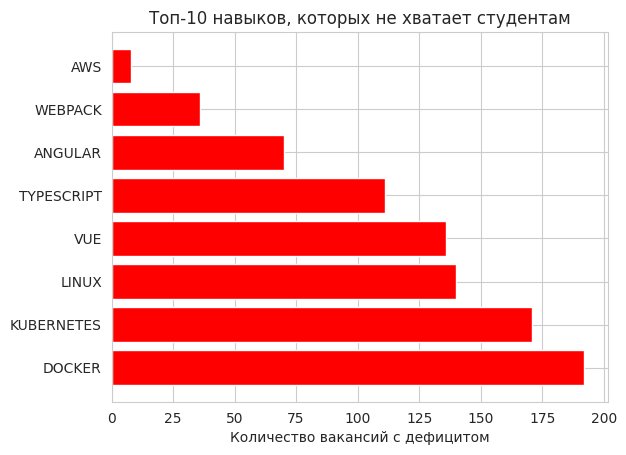

In [46]:
skills, counts = zip(*sorted_deficit[:10])  # Берем топ-10

plt.barh(skills, counts, color='red')
plt.title("Топ-10 навыков, которых не хватает студентам")
plt.xlabel("Количество вакансий с дефицитом")
plt.show()

<Figure size 1200x600 with 0 Axes>

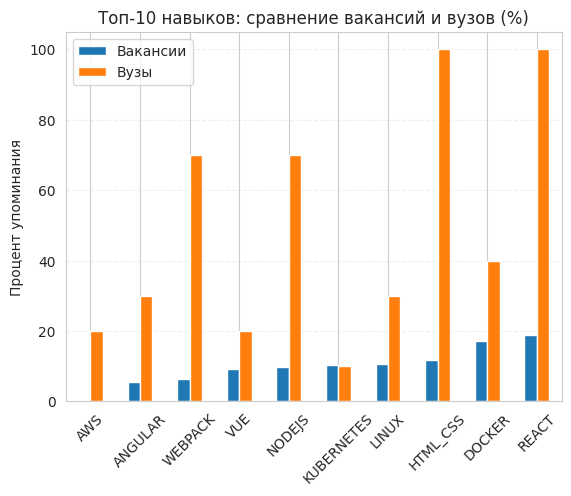

In [47]:
vacancies = df
universities = df_students

vacancy_skills = vacancies.iloc[:, 6:]
vacancy_counts = vacancy_skills.sum().sort_values()

university_skills = universities.iloc[:, 1:]
university_counts = university_skills.sum().sort_values()

top_skills = vacancy_counts.head(10).index

comparison = pd.DataFrame({
    'Вакансии': vacancy_counts[top_skills],
    'Вузы': university_counts[top_skills]
})

comparison['Вакансии'] = (comparison['Вакансии'] / len(vacancies)) * 100
comparison['Вузы'] = (comparison['Вузы'] / len(universities)) * 100

plt.figure(figsize=(12, 6))
comparison.plot(kind='bar')
plt.title('Топ-10 навыков: сравнение вакансий и вузов (%)')
plt.ylabel('Процент упоминания')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

<ipython-input-48-ff7ae6f089f2>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot(angles, vacancy_percent.tolist() + [vacancy_percent[0]], 'o-', label='Вакансии')
<ipython-input-48-ff7ae6f089f2>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot(angles, university_percent.tolist() + [university_percent[0]], 'o-', label='Вузы')
<ipython-input-48-ff7ae6f089f2>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.fill(ang

<function matplotlib.pyplot.show(close=None, block=None)>

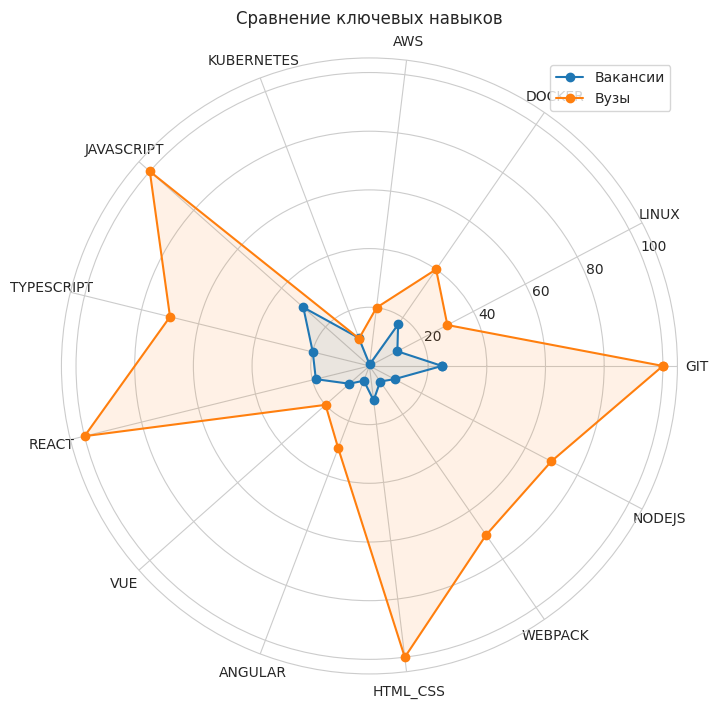

In [48]:
skills_for_radar = ['GIT', 'LINUX', 'DOCKER', 'AWS',	'KUBERNETES', 'JAVASCRIPT',	'TYPESCRIPT', 'REACT', 'VUE', 'ANGULAR','HTML_CSS',	'WEBPACK', 'NODEJS']
vacancy_percent = (vacancy_skills[skills_for_radar].sum() / len(vacancies)) * 100
university_percent = (university_skills[skills_for_radar].sum() / len(universities)) * 100

angles = np.linspace(0, 2 * np.pi, len(skills_for_radar), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})
ax.plot(angles, vacancy_percent.tolist() + [vacancy_percent[0]], 'o-', label='Вакансии')
ax.plot(angles, university_percent.tolist() + [university_percent[0]], 'o-', label='Вузы')
ax.fill(angles, vacancy_percent.tolist() + [vacancy_percent[0]], alpha=0.1)
ax.fill(angles, university_percent.tolist() + [university_percent[0]], alpha=0.1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(skills_for_radar)
ax.set_title('Сравнение ключевых навыков', pad=25)
ax.legend(loc='upper right')
plt.show

KUBERNETES    -0.215054
VUE           10.860215
LINUX         19.247312
AWS           19.462366
DOCKER        22.795699
ANGULAR       24.623656
TYPESCRIPT    50.107527
NODEJS        60.322581
WEBPACK       63.548387
JAVASCRIPT    69.892473
GIT           75.268817
REACT         81.182796
HTML_CSS      88.172043
dtype: float64


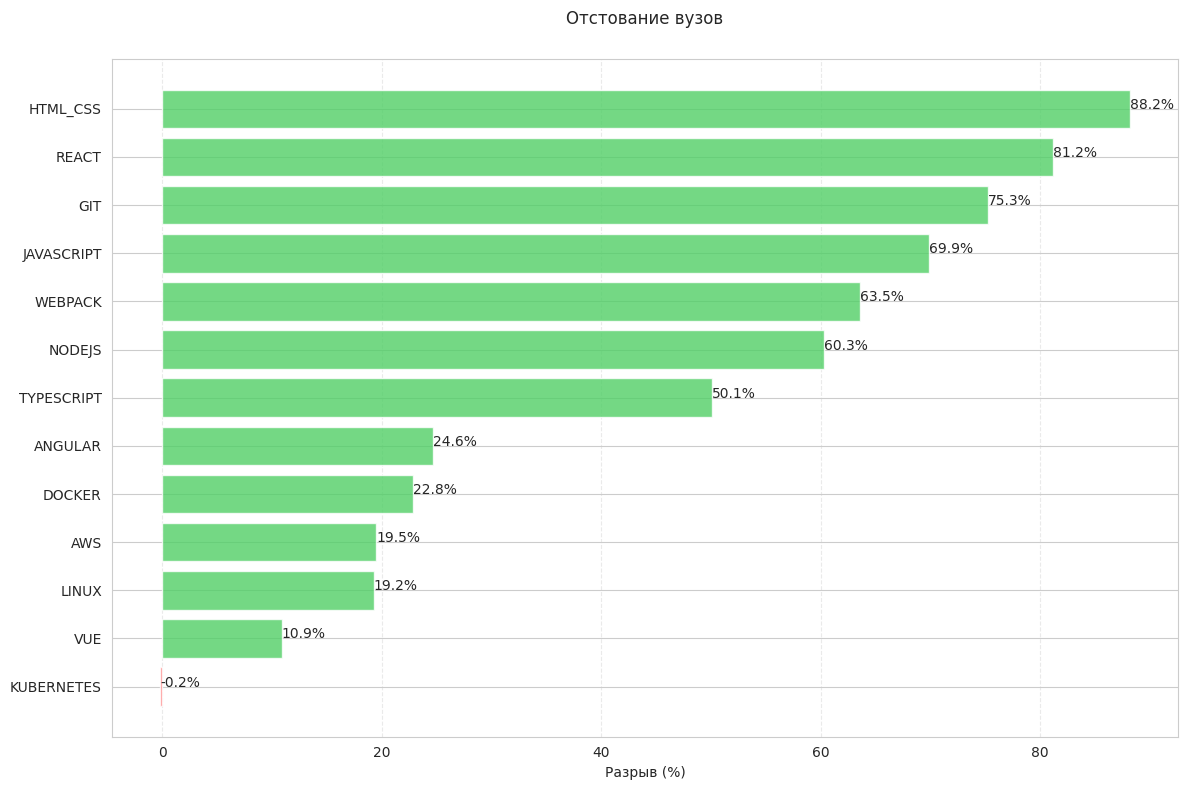

In [49]:
gap = (university_skills.mean()-vacancy_skills.mean()) * 100
gap_sorted = gap.sort_values(ascending=True)[2:]
print(gap_sorted)


plt.figure(figsize=(12, 8))
colors = ['#51cf66' if x > 0 else '#ff6b6b' for x in gap_sorted]
bars = plt.barh(gap_sorted.index, gap_sorted, color=colors, alpha=0.8)


plt.title('Отстование вузов', pad=25)
plt.xlabel('Разрыв (%)', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.4)

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,  f'{width:.1f}%')

plt.tight_layout()
plt.show()